In [1]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer, LancasterStemmer
from nltk.stem.porter import *
import numpy as np

import spacy
np.random.seed(2018)
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
stemmer = LancasterStemmer()


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
!python3 -m spacy download en
!pip install top2vec
!pip install pyLDAvis==3.2.1

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-26 18:15:06.797854: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-26 18:15:06.797974: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-26 18:15:06.797992: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [3]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [5]:

df  = pd.read_csv("/content/CageUK_cleaned_posts.csv")




In [9]:
temp_l = list(df.columns)
temp_l[0] = "posts"
df.columns = temp_l
df

,posts,posts_clean,posts_list
0,To end the year we wanted to share some of the...,end year wanted share act courage incredible c...,"['end', 'year', 'wanted', 'share', 'act', 'cou..."
1,Will your kids be deprived of their citizenshi...,kid deprived citizenship citizenship deprivati...,"['kid', 'deprived', 'citizenship', 'citizenshi..."
2,What does the Nationality and Borders Bill mea...,nationality border bill mean read understand r...,"['nationality', 'border', 'bill', 'mean', 'rea..."
3,Can France monopolise control over its Muslim ...,france monopolise control muslim community fre...,"['france', 'monopolise', 'control', 'muslim', ..."
4,IT'S TOMORROW!!\n\nDon't forget to register!!!...,tomorrow forget register click link easily reg...,"['tomorrow', 'forget', 'register', 'click', 'l..."
...,...,...,...
1305,Torture is just a way of getting what you want...,torture way getting want even truth take ibn a...,"['torture', 'way', 'getting', 'want', 'even', ..."
1306,"""When a white man does it, he is suspected of ...",white man suspected mental illness problem mus...,"['white', 'man', 'suspected', 'mental', 'illne..."
1307,Join us on the 11th of January for our exclusi...,join u 11th january exclusive event guantanamo...,"['join', 'u', '11th', 'january', 'exclusive', ..."
1308,https://www.cage.ngo/mentally-ill-but-still-a-...,cagengo mentally ill still terrorist,"['cagengo', 'mentally', 'ill', 'still', 'terro..."


In [8]:
df.posts=df.posts.astype(str)

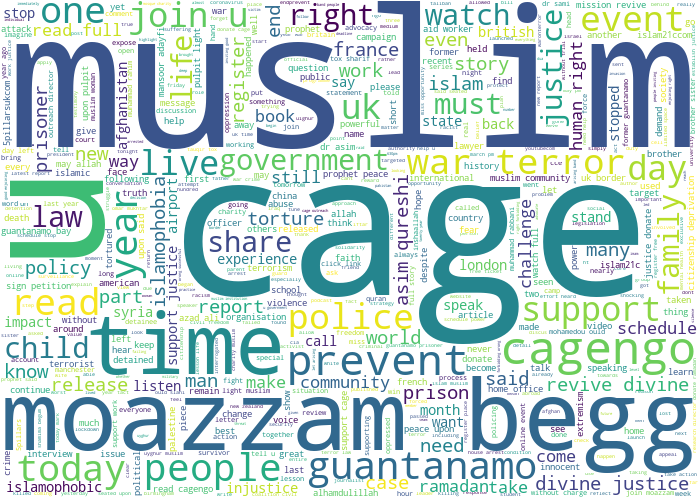

In [15]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
long_string = ','.join(list(df['posts_clean'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, width=700, height=500, contour_width=10, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()


In [16]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

df_article_list = df.posts.values.tolist()
data_words = list(sent_to_words(df_article_list))

print(data_words[:1])


[['to', 'end', 'the', 'year', 'we', 'wanted', 'to', 'share', 'some', 'of', 'the', 'acts', 'of', 'courage', 'from', 'incredible', 'clients', 'we', 'supported', 'this', 'year', 'the', 'cases', 'ranged', 'from', 'torture', 'in', 'the', 'middle', 'east', 'to', 'police', 'door', 'stepping', 'here', 'in', 'the', 'uk', 'and', 'everything', 'in', 'between', 'we', 'have', 'duty', 'to', 'them', 'to', 'celebrate', 'their', 'wins', 'and', 'stand', 'in', 'solidarity', 'with', 'them', 'in', 'their', 'moments', 'of', 'difficulty', 'click', 'on', 'the', 'link', 'below', 'to', 'read', 'this', 'piece', 'by', 'our', 'brilliant', 'casework', 'manager', 'naila', 'ahmed', 'https', 'www', 'cage', 'ngo', 'acts', 'of', 'courage', 'in', 'share', 'and', 'tag', 'us', 'on', 'the', 'posts', 'waronterror', 'islamophobia', 'advocacy', 'islam', 'muslims', 'activism']]


In [17]:
###### create a bigram model from words like Health_Care
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [18]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [20]:
'''
Removing stopwords, creating bigrams for training and lemmatization.
During lemmatization, we also check the POS tags and keep only
 'NOUN', 'ADJ', 'VERB', 'ADV','PROPN'

'''


data_words_nostops = remove_stopwords(data_words)

data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV','PROPN'])

print(data_lemmatized[:1])


[['end', 'year', 'want', 'share', 'act', 'courage', 'incredible', 'client', 'support', 'year', 'case', 'range', 'torture', 'police', 'door', 'step', 'uk', 'duty', 'celebrate', 'win', 'stand', 'solidarity', 'moment', 'difficulty', 'click', 'link', 'read', 'piece', 'brilliant', 'casework', 'manager', 'naila', 'ahmed', 'https', 'www', 'cage', 'ngo', 'act', 'courage', 'share', 'tag', 'post', 'waronterror', 'islamophobia', 'advocacy', 'islam', 'muslims', 'activism']]


In [21]:
data_words_bigrams[0]

['end',
 'year',
 'wanted',
 'share',
 'acts',
 'courage',
 'incredible',
 'clients',
 'supported',
 'year',
 'cases',
 'ranged',
 'torture',
 'middle_east',
 'police',
 'door',
 'stepping',
 'uk',
 'everything',
 'duty',
 'celebrate',
 'wins',
 'stand',
 'solidarity',
 'moments',
 'difficulty',
 'click',
 'link',
 'read',
 'piece',
 'brilliant',
 'casework',
 'manager',
 'naila',
 'ahmed',
 'https',
 'www',
 'cage',
 'ngo',
 'acts',
 'courage',
 'share',
 'tag',
 'us',
 'posts',
 'waronterror',
 'islamophobia',
 'advocacy',
 'islam',
 'muslims',
 'activism']

#### CREATE CORPUS AND DICT FOR BOW

In [22]:
id2word = corpora.Dictionary(data_lemmatized)

# # Create Corpus
texts = data_lemmatized

##Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# # View how many times each word occurs in first corpus
print(corpus[:1])



[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2)]]


**TOP WORDS FROM EACH TOPIC AND TRAIN MODEL**


In [23]:
import time
from pprint import pprint



def make_model(num_topics=12):

  t_start = time.time()

  ##### we try with a random number 12 topics,
  #### later we will find the optimal number of topics

  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics, 
                                            )

  print("time taken for BOW LDA for 15 topics is: "+str(time.time()-t_start)+" seconds")
  '''Let's see what these topics look like, by fetching the top words from each topic:'''
  pprint("******* LIST OF TOP 10 WORDS FROM EACH TOPIC *************")
  pprint(lda_model.print_topics())

  return lda_model

In [24]:
lda_model = make_model(12)

time taken for BOW LDA for 15 topics is: 2.0194947719573975 seconds
'******* LIST OF TOP 10 WORDS FROM EACH TOPIC *************'
[(0,
  '0.017*"cage" + 0.013*"muslim" + 0.011*"ngo" + 0.009*"https" + 0.007*"time" '
  '+ 0.007*"justice" + 0.006*"schedule" + 0.006*"stop" + 0.006*"pm" + '
  '0.006*"com"'),
 (1,
  '0.029*"cage" + 0.026*"https" + 0.019*"com" + 0.015*"ngo" + '
  '0.015*"cagengo_samcart" + 0.013*"justice" + 0.011*"support" + '
  '0.010*"muslim" + 0.010*"appeal" + 0.009*"say"'),
 (2,
  '0.019*"prevent" + 0.015*"cage" + 0.011*"ngo" + 0.009*"https" + 0.007*"www" '
  '+ 0.006*"police" + 0.005*"muslim" + 0.005*"report" + 0.005*"pm" + '
  '0.005*"justice"'),
 (3,
  '0.017*"cage" + 0.016*"https" + 0.011*"muslim" + 0.010*"www" + 0.008*"com" + '
  '0.008*"ngo" + 0.007*"year" + 0.007*"moazzam_begg" + 0.007*"schedule" + '
  '0.006*"uk"'),
 (4,
  '0.033*"cage" + 0.021*"https" + 0.020*"ngo" + 0.015*"www" + 0.012*"com" + '
  '0.009*"event" + 0.007*"muslim" + 0.007*"year" + 0.006*"justice" +

In [25]:
lda_model.save("/content/cageuk")

In [26]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.003182 -0.013587       1        1  13.881670
1     -0.096109  0.008339       2        1  12.546305
4     -0.003551  0.000051       3        1  12.380224
3      0.039311 -0.038001       4        1  10.463251
6     -0.024573  0.040428       5        1   8.335648
0      0.009338 -0.034162       6        1   7.979507
7     -0.005243 -0.015134       7        1   7.197718
9     -0.019557 -0.035815       8        1   6.687983
11    -0.042157  0.037134       9        1   6.489220
10     0.042509 -0.050699      10        1   6.250523
5      0.030141  0.021138      11        1   4.884510
2      0.073073  0.080309      12        1   2.903441, topic_info=                 Term         Freq        Total Category  logprob  loglift
235           prevent   210.000000   210.000000  Default  30.0000  30.0000
5                cage  1039.000000  1039.000000  Default  29.0000  29.0000
2105  cagengo_samcart   160.000000   160.000000  Default  28.0000  28.0000
25                ngo   557.000000   557.000000  Default  27.0000  27.0000
387            appeal    93.000000    93.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
323            terror     4.454943   177.614684  Topic12  -5.7321  -0.1463
83               time     3.967348   164.741306  Topic12  -5.8480  -0.1870
135             event     4.103694   245.972266  Topic12  -5.8142  -0.5541
35            support     3.934850   221.873196  Topic12  -5.8562  -0.4930
56          community     3.668067   114.794353  Topic12  -5.9264   0.0958

[1014 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1775      4  0.128375         abdul
1775      7  0.128375         abdul
1775      8  0.641877         abdul
3925      1  0.200617  abdul_kareem
3925      7  0.401235  abdul_kareem
...     ...       ...           ...
4357      9  0.172655          zmyf
4357     11  0.086328          zmyf
4862      8  0.572114            zy
2537      3  0.383924      المسلمين
2919      3  0.384015         فرنسا

[2996 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 5, 4, 7, 1, 8, 10, 12, 11, 6, 3])

In [ ]:
###### AS we can see above, there is a heavy overlap between topics.
##### Also most of these topics dont seem to make generic sense. Let's try to find an 
###### optimal value of num_topics, that gives the highest value of coherence score(METRIC for topic classification)

In [ ]:
# lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=15, id2word=dictionary, passes=2, workers=2)
# # for idx, topic in lda_model.print_topics(-1):
#     # print('Topic: {} \nWords: {}'.format(idx, topic))

In [27]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\\nCoherence Score: ', coherence_lda)

\nCoherence Score:  0.3699528239749675


CURRENT COHERENCE SCORE IS 0.34. Let's see if we can 
find a better num_topics, that gives us better coherence score

In [28]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print("for num : "+str(num_topics))
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [29]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

t_start = time.time()
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=36, step=5)
print("time for topic search is: "+str(time.time()-t_start)+" seconds")

for num : 2


for num : 7


for num : 12


for num : 17


for num : 22


for num : 27


for num : 32
time for topic search is: 21.199703693389893 seconds


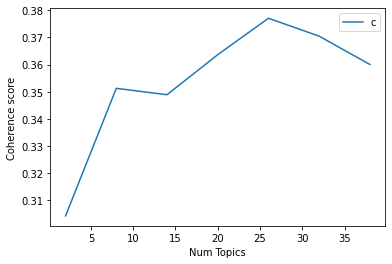

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [31]:
########## BASED ON ABOVE GRAPH, the best value of 
########## num topic seems to be around 15 topics.
######### Let's try with that.
lda_model_best = make_model(14)


time taken for BOW LDA for 15 topics is: 2.1028101444244385 seconds
'******* LIST OF TOP 10 WORDS FROM EACH TOPIC *************'
[(0,
  '0.035*"cage" + 0.021*"https" + 0.012*"com" + 0.012*"ngo" + 0.009*"support" '
  '+ 0.009*"pm" + 0.009*"event" + 0.008*"justice" + 0.008*"time" + '
  '0.008*"www"'),
 (1,
  '0.024*"cage" + 0.022*"https" + 0.014*"com" + 0.012*"ngo" + 0.010*"www" + '
  '0.009*"justice" + 0.008*"muslim" + 0.008*"torture" + '
  '0.008*"cagengo_samcart" + 0.007*"say"'),
 (2,
  '0.018*"https" + 0.013*"cage" + 0.012*"join" + 0.011*"event" + 0.010*"ngo" + '
  '0.009*"justice" + 0.008*"day" + 0.007*"www" + 0.007*"pm" + '
  '0.006*"moazzam_begg"'),
 (3,
  '0.015*"https" + 0.014*"com" + 0.011*"cage" + 0.011*"muslim" + 0.011*"ngo" + '
  '0.011*"www" + 0.007*"prevent" + 0.006*"guantanamo" + 0.006*"year" + '
  '0.005*"man"'),
 (4,
  '0.024*"cage" + 0.024*"https" + 0.017*"com" + 0.012*"ngo" + 0.012*"www" + '
  '0.011*"justice" + 0.011*"cagengo_samcart" + 0.009*"ramadan" + '
  '0.007*"

**** VIZUALIZATION OF 14 TOPICS WITH TOP TERMS *******

In [32]:
vis = pyLDAvis.gensim.prepare(lda_model_best, corpus, id2word)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.022697  0.009442       1        1  11.852192
0      0.027741 -0.002871       2        1  11.405948
4      0.026396  0.052627       3        1  10.153558
5     -0.004615  0.007712       4        1   9.988633
8      0.032976 -0.002403       5        1   8.611347
11    -0.034375 -0.007235       6        1   8.459979
13    -0.020394  0.013420       7        1   7.435345
2      0.061383 -0.057463       8        1   5.855817
10     0.030516 -0.080991       9        1   4.727066
6     -0.059532 -0.038815      10        1   4.680794
1      0.017161  0.083011      11        1   4.526779
3     -0.057487 -0.003897      12        1   4.215928
12     0.076839  0.020656      13        1   4.063535
9     -0.073913  0.006807      14        1   4.023081, topic_info=           Term        Freq       Total Category  logprob  loglift
324         war  214.000000  214.000000  Default  30.0000  30.0000
135       event  245.000000  245.000000  Default  29.0000  29.0000
98          com  509.000000  509.000000  Default  28.0000  28.0000
37      torture  160.000000  160.000000  Default  27.0000  27.0000
147        join  181.000000  181.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
426  guantanamo    7.542212  222.080193  Topic14  -5.5317  -0.1694
27       police    6.696374  148.949416  Topic14  -5.6507   0.1111
23      muslims    6.487136  145.553456  Topic14  -5.6824   0.1024
38           uk    6.976164  223.187691  Topic14  -5.6097  -0.2524
704        stop    6.012208  124.747703  Topic14  -5.7584   0.1806

[1128 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1775      2  0.126961       abdul
1775      3  0.126961       abdul
1775      7  0.380882       abdul
1775     14  0.126961       abdul
417       3  0.690750  abdulqadir
...     ...       ...         ...
1226      5  0.565048         تتم
2917     12  0.597221        شكوى
2918     12  0.597221          ضد
2930      5  0.753909        قناة
2920     12  0.597221     مسلميها

[3346 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 5, 6, 9, 12, 14, 3, 11, 7, 2, 4, 13, 10])

In [33]:
 x=lda_model_best.print_topics()[5][-1].split('''"''')
 x=[x[x1] for x1 in range(len(x)) if x1%2!=0]
 print(x)

['cage', 'https', 'ngo', 'war', 'com', 'terror', 'www', 'muslim', 'year', 'justice']


From the above Visualization, we can see the top words in all topics.
We can also check the top words overall and how many words (proportion) are present in each topic. Size of bubbles in the viz is proportional to the topic size (number of articles belonging to that topic). We can label the topics as follows(based on the words occuring in them):





1.   **TOPIC 1: US Presidential Elections**

      WORDS:['trump', 'donald', 'president', 'clinton', 'hillary', 'say', 'republican', 'presidential', 'campaign', 'election']



2.   **TOPIC 2: MISC**

      WORDS: ['new', 'year', 'big', 'world', 'first', 'show', 'york', 'get', 'time', 'go']



3.   **TOPIC 3: Crime and Law-Enforcement**  

      WORDS: ['police', 'kill', 'say', 'people', 'attack', 'isis', 'car', 'city', 'officer', 'official']



4.   **TOPIC 4: Crime and Law-Enforcement**

      WORDS: ['man', 'woman', 'charge', 'year', 'new', 'police', 'death', 'die', 'say', 'gun']


5.   **TOPIC 5: Startups and Business**

      WORDS: ['cnn', 'company', 'ceo', 'facebook', 'startup', 'new', 'make', 'share', 'stock', 'tech']


6.   **TOPIC 6: Terrorism and Aviation Crashes**

      WORDS: ['news', 'syria', 'breitbart', 'flight', 'war', 'daily', 'terrorist', 'syrian', 'passenger', 'say']

7.   **TOPIC 7: MISC**

      WORDS: ['cnn', 'us', 'state', 'new', 'say', 'tell', 'governor', 'north_carolina', 'gop', 'washington']


8.   **TOPIC 8: International Information Security**

      WORDS:['russia', 'tesla', 'russian', 'senate', 'say', 'cnn', 'official', 'investigation', 'report', 'hack']



9.   **TOPIC 9: MISC**

      WORDS: ['cnn', 'say', 'former', 'report', 'department', 'state', 'fox_news', 'use', 'wednesday', 'iran']



10.   **TOPIC 10: Education**  

      WORDS: ['student', 'cnn', 'university', 'black', 'college', 'white', 'school', 'team', 'say', 'event']



11.   **TOPIC 11: MISC**

      WORDS: ['amazon', 'photo', 'north_korea', 'say', 'sale', 'customer', 'may', 'day', 'school', 'test']



12.   **TOPIC 12: International Affairs**

      WORDS: ['say', 'london', 'hedge_fund', 'leave', 'oil', 'british', 'people', 'market', 'french', 'report']


13.   **TOPIC 13: HealthCare Laws / HeathCare**

      WORDS: ['house', 'gop', 'bill', 'act', 'win', 'pass', 'obamacare', 'wisconsin', 'get', 'year']

14.   **TOPIC 14: TECHNOLOGY & BUSINESS**

      WORDS: ['apple', 'china', 'google', 'business_insider', 'iphone', 'launch', 'yahoo', 'us', 'uber', 'company']













**USING VECTOR MODEL (TOP2VEC)**




In [44]:
########## NEXT ONE, WE DO THE SAME TOPIC MODELING, BUT THIS TIME USING A 
########## VECTOR BASED MODEL CALLED TOP2VEC, INSTEAD OF BOW & LDA

!pip install -U --upgrade-strategy eager pip
!pip install -U --upgrade-strategy eager setuptools
!pip install -U --upgrade-strategy eager wheel
!pip install -U --upgrade-strategy eager numpy
!pip install -U --upgrade-strategy eager scipy
!pip install -U --upgrade-strategy eager scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached setuptools-67.4.0-py3-none-any.whl (1.1 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.4.0 which is incompatible.
Looking in indexes: h

In [4]:
!pip install numpy==1.23.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from top2vec import Top2Vec

In [6]:
len(df["posts"])


1310

In [ ]:
######### IMPORTANT
'''
The only reason I have taken only titles here, is because training with title+content takes a very long time 
and the notebook times out/RAM exceeds. With sufficient resources we can try the complete texts.
'''

In [9]:
vector_model = Top2Vec(documents=df["posts"].to_list(), speed="learn", workers=8)
vector_model.get_num_topics()


2023-02-26 18:18:37,966 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-02-26 18:18:38,426 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-02-26 18:18:45,361 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-02-26 18:18:59,998 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-02-26 18:19:00,036 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


4

In [10]:
######## model extarcted 206 topics
topic_sizes, topic_nums = vector_model.get_topic_sizes()


In [11]:
topic_sizes

array([793, 419,  65,  33])

In [14]:
'''
We now reduce the original topics to 15. This is done by hierarchical_topic_reduction,
which  merges the topics together, until said number of topics are achieved.
'''
heirar = vector_model.hierarchical_topic_reduction(3)


TOP 10 WORDS IN EACH TOPIC

In [16]:
topic_words, word_scores, t_nums= vector_model.get_topics()


In [17]:
print(topic_words[2])

['war' 'policy' 'terror' 'pm' 'new' 'director' 'china' 'online' 'join'
 'history' 'event' 'moazzam' 'former' 'prevent' 'on' 'laws' 'begg' 'th'
 'afghanistan' 'youtube' 'palestine' 'muslims' 'co' 'prisoners' 'against'
 'ngo' 'full' 'years' 'www' 'since' 'two' 'live' 'theguardian' 'as'
 'government' 'then' 'eventbrite' 'challenge' 'legal' 'british' 'report'
 'terrorism' 'uk' 'hear' 'society' 'life' 'counter' 'qureshi' 'times'
 'their']


In [ ]:
############# Topic 1 -> 15, with top 10 words:
for i in heirar:
  word_score_list=[]
  for topic in i:
    for topic_word, word_score in zip(topic_words[topic][:10], word_scores[topic][:10]):
      word_score_list.append((topic_word, word_score))
  sorted(word_score_list, key = lambda x: x[1])
  print(word_score_list[:10])

[('scott', 0.63315845), ('golden', 0.6323886), ('trailer', 0.6034416), ('haley', 0.5888857), ('strikes', 0.56962085), ('orlando', 0.56812835), ('political', 0.56326306), ('turns', 0.55856866), ('federal', 0.5565098), ('jerry', 0.5551617)]
[('enough', 0.5680914), ('page', 0.53760237), ('planning', 0.5323053), ('show', 0.5311992), ('puts', 0.5099174), ('youtube', 0.50939363), ('trailer', 0.5086077), ('rules', 0.5037737), ('challenge', 0.5017392), ('career', 0.4960697)]
[('cancels', 0.54903793), ('body', 0.52910715), ('culture', 0.51116645), ('concert', 0.50782174), ('surge', 0.5034838), ('terrorism', 0.4919152), ('france', 0.48975122), ('area', 0.48912305), ('marine', 0.487315), ('disaster', 0.4868222)]
[('young', 0.6632534), ('schools', 0.62509763), ('both', 0.6112601), ('movie', 0.5968899), ('german', 0.58096176), ('germany', 0.56304103), ('asylum', 0.55906296), ('shootings', 0.5540372), ('allies', 0.5522351), ('speaks', 0.54612637)]
[('left', 0.6725133), ('winner', 0.6660712), ('green

In [ ]:
'''
As we can see above, the vector based method is not very accurate for topic modeling(in our case).
The reason for this can be since we have only taken titles, I might have affected the performance.
Or the model (DOC2VEC based) is not very helpful for these documents, we can try with universal-sentence-encoder.


'''